In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd

In [76]:
X, y = make_classification(n_samples=1000,
                           n_features=20,
                           n_informative=2,
                           n_redundant=10,
                           n_clusters_per_class=1)

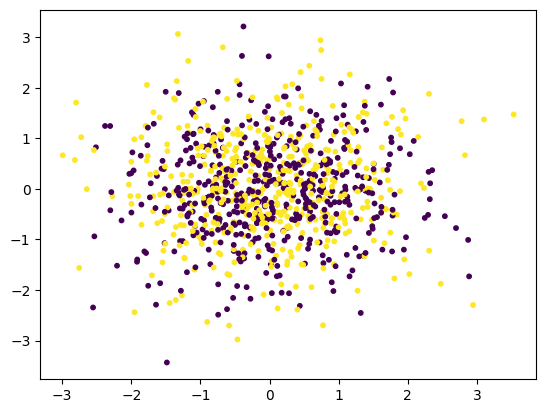

In [77]:
#plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='viridis')
plt.show()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)
train_accuracies = []
test_accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_predictions = knn.predict(X_train)
    test_predictions = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# não precisamos usar um dataframe aqui, mas ajuda a visualizar os resultados
dataframe = pd.DataFrame({'train': train_accuracies, 'test': test_accuracies})

print("Max accuracy: ", dataframe['test'].max(), "with", dataframe['test'].idxmax(), "neighbors")

Max accuracy:  0.9633333333333334 with 5 neighbors


Também podemos usar um aparato gráfico para visualizar a relação entre o número de vizinhos e a acurácia do modelo.

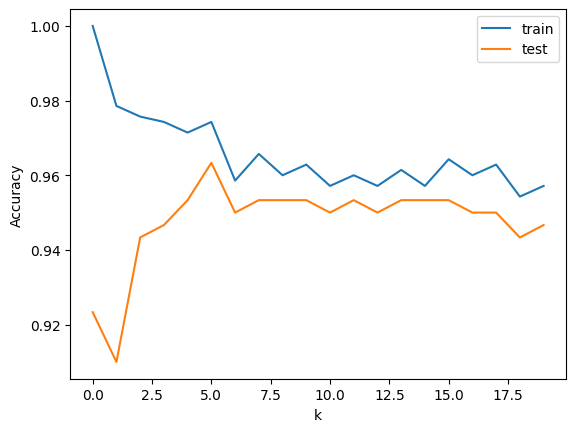

In [79]:
plt.plot(range(0, k), train_accuracies, label='train')
plt.plot(range(0, k), test_accuracies, label='test')

plt.xlabel('Vizinhos')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=dataframe['test'].idxmax())
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
array_predictions = np.array(predictions)

KNeighborsClassifier()

In [82]:
confusion_matrix(y_test, predictions)

array([[138,  12],
       [  2, 148]])

In [88]:
accuracy_score(y_test, predictions)
precision_score(y_test, predictions)
recall_score(y_test, predictions)
f1_score(y_test, predictions)

print("Accuracy: ", accuracy_score(y_test, predictions),"\n"
      "Precision: ", precision_score(y_test, predictions), "\n"
      "Recall: ", recall_score(y_test, predictions), "\n"
      "F1: ", f1_score(y_test, predictions))

Accuracy:  0.9533333333333334 
Precision:  0.925 
Recall:  0.9866666666666667 
F1:  0.9548387096774194
